## Imports

In [20]:
import nltk
import os
import math
import torch
import random
import pandas as pd
import matplotlib.pyplot as plt
from evaluate import load as load_metric
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import (
    BartTokenizer, 
    BartForConditionalGeneration, 
    TrainingArguments, 
    Trainer,
    TrainerCallback,
    EarlyStoppingCallback)

In [21]:
nltk.download('punkt', quiet=True)
nltk.data.path.append('/Users/trevordoucet/nltk_data')
os.environ['NLTK_DATA'] = '/Users/trevordoucet/nltk_data'

Training, Test, Validation Data

In [47]:
df = pd.read_excel('../data/final_descriptions.xlsx')

## Loading Pre-Trained Model & Training

### Model 1: Facebook / Bart Large - CNN

https://huggingface.co/facebook/bart-large-cnn

Training setup

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]/Users/trevordoucet/Library/Python/3.9/lib/python/site-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
Map: 100%|██████████| 968/968 [00:00<00:00, 2359.19 examples/s]
/Users/trevordoucet/Library/Python/3.9/lib/python/site-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/c9/nckl2xts1ys2_knbj2y1562h0000gn/T/ipykernel_871/592039975.py:75: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` inst

Step,Training Loss,Validation Loss
500,1.040100,1.020923
1000,1.054600,1.005842
1500,1.041000,0.994388


{'loss': 1.1543, 'grad_norm': 2.6205241680145264, 'learning_rate': 1.9483204134366928e-05, 'epoch': 0.025839793281653745}
{'loss': 1.1049, 'grad_norm': 2.2728419303894043, 'learning_rate': 1.896640826873385e-05, 'epoch': 0.05167958656330749}
{'loss': 1.0919, 'grad_norm': 2.4586308002471924, 'learning_rate': 1.8449612403100777e-05, 'epoch': 0.07751937984496124}
{'loss': 1.0751, 'grad_norm': 2.931312322616577, 'learning_rate': 1.79328165374677e-05, 'epoch': 0.10335917312661498}
{'loss': 1.0724, 'grad_norm': 2.6244311332702637, 'learning_rate': 1.7416020671834626e-05, 'epoch': 0.12919896640826872}
{'loss': 1.0862, 'grad_norm': 2.222874641418457, 'learning_rate': 1.689922480620155e-05, 'epoch': 0.15503875968992248}
{'loss': 1.0337, 'grad_norm': 2.5083720684051514, 'learning_rate': 1.638242894056848e-05, 'epoch': 0.18087855297157623}
{'loss': 1.0666, 'grad_norm': 2.437167167663574, 'learning_rate': 1.5865633074935402e-05, 'epoch': 0.20671834625322996}
{'loss': 1.059, 'grad_norm': 2.49071884

/Users/trevordoucet/Library/Python/3.9/lib/python/site-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


{'loss': 1.026, 'grad_norm': 2.8309733867645264, 'learning_rate': 9.147286821705427e-06, 'epoch': 0.5426356589147286}
{'loss': 1.0403, 'grad_norm': 2.139047622680664, 'learning_rate': 8.630490956072353e-06, 'epoch': 0.5684754521963824}
{'loss': 1.0263, 'grad_norm': 2.2116591930389404, 'learning_rate': 8.113695090439278e-06, 'epoch': 0.5943152454780362}
{'loss': 1.0354, 'grad_norm': 2.3122243881225586, 'learning_rate': 7.596899224806202e-06, 'epoch': 0.6201550387596899}
{'loss': 1.0194, 'grad_norm': 2.2027037143707275, 'learning_rate': 7.080103359173127e-06, 'epoch': 0.6459948320413437}
{'loss': 1.0006, 'grad_norm': 2.697519063949585, 'learning_rate': 6.563307493540052e-06, 'epoch': 0.6718346253229974}
{'loss': 1.0067, 'grad_norm': 2.9552059173583984, 'learning_rate': 6.046511627906977e-06, 'epoch': 0.6976744186046512}
{'loss': 0.9814, 'grad_norm': 2.3788394927978516, 'learning_rate': 5.529715762273902e-06, 'epoch': 0.7235142118863049}
{'loss': 1.0052, 'grad_norm': 2.1151604652404785, '

There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


{'train_runtime': 1247.9755, 'train_samples_per_second': 6.202, 'train_steps_per_second': 1.551, 'total_flos': 4193347405086720.0, 'train_loss': 1.0360884240123345, 'epoch': 1.0}


{'eval_loss': 0.9991085529327393, 'eval_runtime': 30.2647, 'eval_samples_per_second': 31.985, 'eval_steps_per_second': 7.996, 'epoch': 1.0}
Evaluation results: {'eval_loss': 0.9991085529327393, 'eval_runtime': 30.2647, 'eval_samples_per_second': 31.985, 'eval_steps_per_second': 7.996, 'epoch': 1.0}
Perplexity: 2.715859703853416


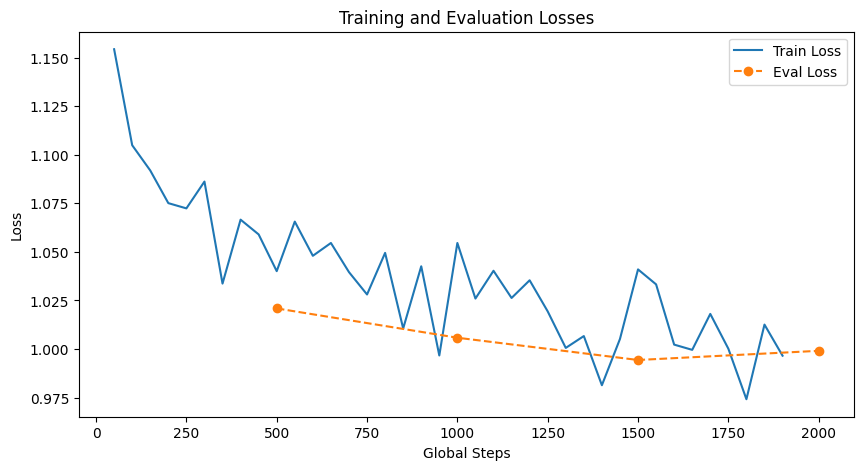

In [48]:
# Model
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.eos_token_id

# Hugging face dataset conversion
dataset = Dataset.from_pandas(df[["prompt", "plot"]])

# T
# rain, test, validate splits
split_dataset = dataset.train_test_split(test_size=0.2)
test_validation = split_dataset['test'].train_test_split(test_size=0.5)
dataset = DatasetDict({
    "train": split_dataset['train'],
    "validation": test_validation['train'],
    "test": test_validation["test"]
})

# Input and target processing
def preprocess(examples):
    inputs = examples["prompt"]
    targets = examples["plot"]
    
    # Tokenize
    model_inputs = tokenizer(inputs, max_length=256, truncation=True, padding="max_length")
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=256, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    
    return model_inputs

tokenized_datasets = dataset.map(preprocess, batched=True, remove_columns=["prompt", "plot"])

# Logging for plotting
class LogCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []
        self.steps = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            # Loss
            if "loss" in logs:
                self.train_losses.append(logs["loss"])
                self.steps.append(state.global_step)
            if "eval_loss" in logs:
                self.eval_losses.append(logs["eval_loss"])
            print(logs) \

log_callback = LogCallback()

# Training Args
training_arguments = TrainingArguments(
    output_dir="../models/model_logs/results_bart",
    evaluation_strategy="steps",
    eval_steps=500,              
    logging_steps=50,            
    logging_dir="../models/model_logs/logs_bart",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=1,
    save_strategy='steps',
    save_steps=1000,
    save_total_limit=2,
    learning_rate=2e-5,
    weight_decay=0.01,
    report_to=["tensorboard"],
    load_best_model_at_end=True, 
    metric_for_best_model="eval_loss",
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_arguments,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1), log_callback]
)

# Fine-tune
trainer.train()

# Evaluate 
results = trainer.evaluate(tokenized_datasets["test"])
print("Evaluation results:", results)

eval_loss = results['eval_loss']
perplexity = math.exp(eval_loss)
print("Perplexity:", perplexity)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(log_callback.steps, log_callback.train_losses, label="Train Loss")
if log_callback.eval_losses:
    eval_steps = list(range(training_arguments.eval_steps, training_arguments.eval_steps * (len(log_callback.eval_losses) + 1), training_arguments.eval_steps))
    plt.plot(eval_steps, log_callback.eval_losses, label="Eval Loss", marker='o', linestyle='--')
plt.xlabel("Global Steps")
plt.ylabel("Loss")
plt.title("Training and Evaluation Losses")
plt.legend()
plt.show()


Save

In [49]:
trainer.save_model("../models/saved_models/bart/trained_bart_model")
tokenizer.save_pretrained("../models/saved_models/bart/trained_bart_model")

('../models/saved_models/bart/trained_bart_model/tokenizer_config.json',
 '../models/saved_models/bart/trained_bart_model/special_tokens_map.json',
 '../models/saved_models/bart/trained_bart_model/vocab.json',
 '../models/saved_models/bart/trained_bart_model/merges.txt',
 '../models/saved_models/bart/trained_bart_model/added_tokens.json')

## Model Load

In [9]:
# Model load
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
bart_model_path = "../models/saved_models/bart/trained_bart_model"
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_path, local_files_only=True)
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_path, local_files_only=True)
device = torch.device("cpu")
bart_model.to(device)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(50264, 1024, padding_idx=2)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=2)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
    

## Output Testing

In [19]:
prompt_prefix = "Imagine a movie plot idea for '"
prompts = [
    "The Traveler"
]

for prompt in prompts:
    full_prompt = prompt_prefix + prompt + "': "
    
    # Encoding
    input_ids = bart_tokenizer.encode(full_prompt, return_tensors="pt", max_length=256, truncation=True)
    input_ids = input_ids.to(device)
    
    # Generate
    outputs = bart_model.generate(
        input_ids,
        min_length=40,
        max_length=80,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        no_repeat_ngram_size=3,
        temperature=0.5
    )

    # Decoding
    generated_text = bart_tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    print("Prompt:")
    print(full_prompt)
    print("Generated Text:")
    print(generated_text)

Prompt:
Imagine a movie plot idea for 'The Traveler': 
Generated Text:
A young woman travels to a remote village in the South of France to stay with her father, but finds herself in a dangerous situation when she is attacked by a violent man and her mother. She is forced to flee and must find a way to escape before she dies.


## Evaluations

In [16]:
bart_model.to("cpu")

# Split
df = pd.read_excel("../data/final_descriptions.xlsx")
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df  = train_test_split(temp_df, test_size=0.5, random_state=42)

# Due to the limited resources, randomly sample 50 validaiton rows for evaluation
n_sample   = min(50, len(val_df))
val_sample = val_df.sample(n=n_sample, random_state=42).reset_index(drop=True)

# Search space with possible parameters
param_space = {
    "temperature": [0.01, 0.5, 0.8],
    "min_length": [40, 50],
    "max_length": [60, 80],
    "top_k": [0, 50],
    "top_p":  [0.8, 0.95],
    "no_repeat_ngram_size": [2, 3],
}

def sample_config():
    cfg = {k: random.choice(v) for k, v in param_space.items()}
    if cfg["max_length"] <= cfg["min_length"]:
        cfg["max_length"] = cfg["min_length"] + 10
    return cfg

# Rouge load
rouge = load_metric("rouge")

# Trials with early stopping
max_trials = 20
patience   = 5
best_score = 0.0
no_improve = 0
records    = []

for trial in range(1, max_trials + 1):
    cfg = sample_config()
    preds, refs = [], []

    # Generate for each sample
    for _, row in val_sample.iterrows():
        inputs = bart_tokenizer(
            row["prompt"],
            return_tensors="pt",
            truncation=True,
            padding="max_length",
            max_length=256
        )
        out_ids = bart_model.generate(
            **inputs,
            do_sample=True,
            temperature=cfg["temperature"],
            min_length=cfg["min_length"],
            max_length=cfg["max_length"],
            top_k=cfg["top_k"],
            top_p=cfg["top_p"],
            no_repeat_ngram_size=cfg["no_repeat_ngram_size"],
        )

        preds.append(bart_tokenizer.decode(out_ids[0], skip_special_tokens=True))
        refs.append(row["plot"])

    # Rouge computation
    scores   = rouge.compute(predictions=preds, references=refs, use_stemmer=True)
    rougeL_f = scores["rougeL"]
    records.append({**cfg, "rougeL_f": rougeL_f})

    # Early stopping for best score
    if rougeL_f > best_score:
        best_score = rougeL_f
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            break

    # Print trial stats
    print(f"Trial {trial:2d}: rougeL_f = {rougeL_f:.4f}   (best = {best_score:.4f})")

# Save and top 5 configurations
df_results = pd.DataFrame(records)
print("\nTop 5 configs by ROUGE‑L F1:\n", df_results.sort_values("rougeL_f", ascending=False).head(5))
df_results.to_excel("../output_summaries/random_search_rouge_baseline.xlsx", index=False)

Trial  1: rougeL_f = 0.1643   (best = 0.1643)
Trial  2: rougeL_f = 0.1442   (best = 0.1643)
Trial  3: rougeL_f = 0.1361   (best = 0.1643)
Trial  4: rougeL_f = 0.1389   (best = 0.1643)
Trial  5: rougeL_f = 0.1441   (best = 0.1643)

Top 5 configs by ROUGE‑L F1:
    temperature  min_length  max_length  top_k  top_p  no_repeat_ngram_size  \
0         0.50          40          80     50   0.95                     3   
5         0.01          40          80      0   0.80                     2   
1         0.80          50          60      0   0.80                     2   
4         0.80          50          60     50   0.95                     2   
3         0.80          40          80      0   0.95                     3   

   rougeL_f  
0  0.164267  
5  0.156882  
1  0.144175  
4  0.144095  
3  0.138910  


## Cosine similarity analysis from generated text and training data

In [72]:
wiki_plots = pd.read_csv('../data/imbd_wikipedia_movie_plots.csv')
genre_df = pd.merge(df, wiki_plots, how='left', left_on='title', right_on='Title')
genre_df.dropna()

top4 = (
    genre_df["Genre"]
      .value_counts()               
      .drop(labels="unknown", errors="ignore") 
      .nlargest(4)               
      .index     
)

print("Top 4 genres:", list(top4))

# Most popular genres
filtered = genre_df[genre_df["Genre"].isin(top4)]

# 100 rows per genre
sampled = (
    filtered
      .groupby("Genre", group_keys=False)     
      .apply(lambda grp: grp.sample(n=100, random_state=42))
      .reset_index(drop=True)
)

genre_df_sampled = sampled[['title', 'plot', 'prompt', 'Genre']]
wiki_plots.Genre.value_counts()

Top 4 genres: ['comedy', 'drama', 'horror', 'thriller']


/var/folders/c9/nckl2xts1ys2_knbj2y1562h0000gn/T/ipykernel_12239/933167731.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered


Genre
unknown                          6083
drama                            5964
comedy                           4379
horror                           1167
action                           1098
                                 ... 
cbc-tv miniseries                   1
bio-drama                           1
national film board docudrama       1
cult drama                          1
horror romantic comedy              1
Name: count, Length: 2265, dtype: int64

In [68]:
# Best config from Rouge scoring
cfg = {
    "temperature": 0.5,
    "min_length": 40,
    "max_length": 80,
    "top_k": 50,
    "top_p": 0.95,
    "no_repeat_ngram_size": 3,
}

records = []

for _, row in genre_df_sampled.iterrows():
    title = row["prompt"]
    base_plot = row["plot"]
    genre = row["Genre"]

    # Summary generator
    inputs = bart_tokenizer(
        title,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=256
    )
    out_ids = bart_model.generate(
        **inputs,
        do_sample=True,
        **cfg
    )
    gen_plot = bart_tokenizer.decode(out_ids[0], skip_special_tokens=True)

    # Compute cosine similarity
    tfidf = TfidfVectorizer().fit([base_plot, gen_plot])
    v_base, v_gen = tfidf.transform([base_plot, gen_plot])
    score = float(cosine_similarity(v_base, v_gen)[0,0])

    records.append({
        "title": title,
        "base_plot": base_plot,
        "generated_plot": gen_plot,
        "cosine_score": score,
        "genre": genre
    })


df_sim = pd.DataFrame(records)

# Print
print("Top 5 Most Similar:")
print(df_sim.nlargest(5, "cosine_score")[["title","cosine_score"]])

print("\nTop 5 Least Similar:")
print(df_sim.nsmallest(5, "cosine_score")[["title","cosine_score"]])

df_sim.to_excel("../output_summaries/plot_similarity_per_title.xlsx", index=False)

Top 5 Most Similar:
                                                 title  cosine_score
151  Imagine a movie plot idea for 'The Night of Co...      0.492458
203       Imagine a movie plot idea for 'End of Days':      0.465570
62         Imagine a movie plot idea for 'Radio Days':      0.447940
387        Imagine a movie plot idea for 'Ghost Ship':      0.443258
216         Imagine a movie plot idea for 'Catacombs':      0.438967

Top 5 Least Similar:
                                               title  cosine_score
222     Imagine a movie plot idea for 'The Hitcher':      0.011837
101     Imagine a movie plot idea for 'Chowringhee':      0.024029
277      Imagine a movie plot idea for 'Unfriended':      0.049679
378  Imagine a movie plot idea for 'The Salamander':      0.055569
312      Imagine a movie plot idea for 'Blind Date':      0.055628


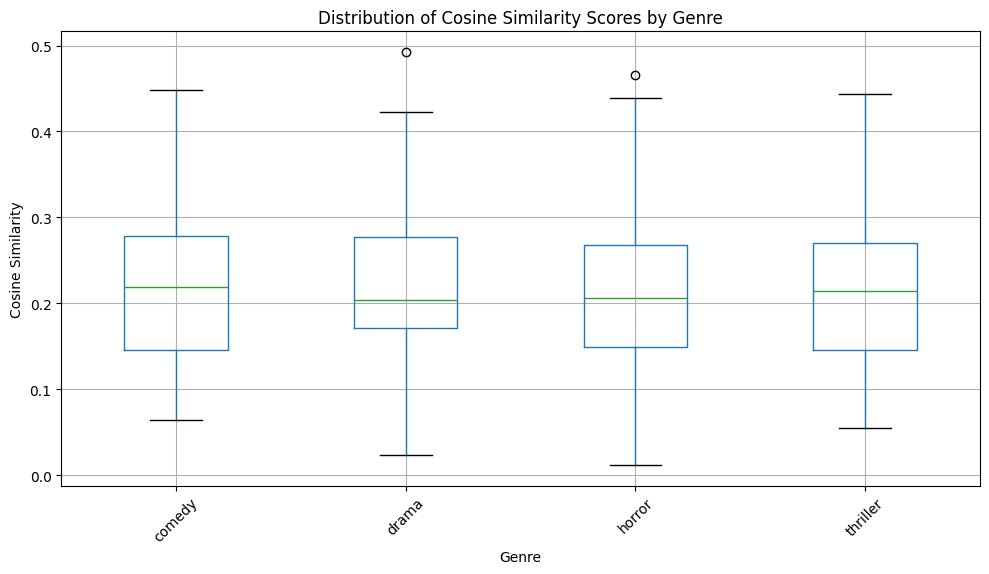

In [69]:
df_sim = pd.read_excel("../output_summaries/plot_similarity_per_title.xlsx")

# Boxplot by Genre
fig, ax = plt.subplots(figsize=(10, 6))
df_sim.boxplot(column="cosine_score", by="genre", ax=ax)
ax.set_title("Distribution of Cosine Similarity Scores by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Cosine Similarity")
plt.suptitle("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()